In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import bisect

scale 1
min
0 l2 1.54935 op 9 ap 8
1 l2 1.76481 op 4 ap 9
2 l2 1.8314 op 9 ap 8
avg 3.86892 at 58
56 l2 3.77307 op 3 ap 2
57 l2 3.90243 op 9 ap 0
58 l2 3.93325 op 2 ap 5


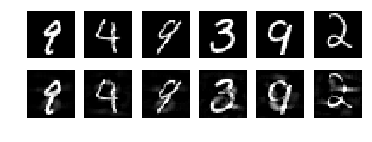

In [4]:
orig_imgs = np.load('results/mnist_orig_imgs.npy')

def l2d(x, y):
    return np.sqrt(np.sum(np.square(x - y)))
raw = matplotlib.colors.Normalize(-1., 1.)
#gs = gridspec.GridSpec(3, 5)
gs = gridspec.GridSpec(2, 6)

min_scale = 4
scale = 1
print 'scale', scale
adv_imgs = np.load('results/mnist_adv_imgs.npy')
ground_truth = np.argmax(np.load('results/mnist_orig_labels.npy'), 1)
orig_pred = ground_truth
adv_pred = np.argmax(np.load('results/mnist_target_labels.npy'), 1)
d = zip(orig_imgs, adv_imgs, ground_truth, orig_pred, adv_pred)
sd = sorted((l2d(oi, ai), oi, ai, op, ap) for oi, ai, gt, op, ap in d if op == gt and ap != gt)
print 'min'
plt.figure(figsize=(6, 2))
for i in range(3):
    l2, oi, ai, op, ap = sd[i]
    print i, 'l2', l2, 'op', op, 'ap', ap
    plt.subplot(gs[0, i])
    plt.imshow(oi[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.subplot(gs[1, i])
    plt.imshow(ai[:, :, 0], cmap='gray')
    plt.axis('off')
    # plt.subplot(gs[2, i])
    # plt.imshow(((ai - oi) * min_scale)[:, :, 0], norm=raw, cmap='RdBu')
    # plt.axis('off')
avg = np.average([l2 for l2, oi, ai, op, ap in sd])
idx = bisect.bisect_left(sd, (avg, None, None, 0, 0))
print 'avg', avg, 'at', idx
for i in range(3):
    l2, oi, ai, op, ap = sd[i + idx - 1]
    print i + idx - 2, 'l2', l2, 'op', op, 'ap', ap
    plt.subplot(gs[0, i + 3])
    plt.imshow(oi[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.subplot(gs[1, i + 3])
    plt.imshow(ai[:, :, 0], cmap='gray')
    plt.axis('off')
    # plt.subplot(gs[2, i + 3])
    # plt.imshow(((ai - oi) * scale)[:, :, 0], norm=raw, cmap='RdBu')
    # plt.axis('off')
plt.show()